## Class 7 Homework: Yelp Reviews

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

`yelp.csv` (in the data folder) contains the Yelp ratings data
* Each observation in this dataset is a review of a particular business by a particular user.
* The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.)
* The "cool" column is the number of "cool" votes this particular review received from other Yelp users. There is no limit to how many "cool" votes a review can receive.
* The "useful" and "funny" columns are similar to the "cool" column.

**Homework tasks:**

1. Read `yelp.csv` into a DataFrame.
2. Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.
3. Define cool/useful/funny as the features, and stars as the response.
4. Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.
5. Evaluate the model by using cross validation and computing the RMSE. Does the RMSE make intuitive sense to you?
6. Try removing some of the features and see if the RMSE improves.
7. **Bonus:** Think of some new features you could create from the existing data that might be predictive of the response. (This is called "feature engineering".) Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.
8. **Bonus:** Compare your best RMSE on testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean rating in the training set for all observations in the testing set.
9. **Bonus:** Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.
10. **Bonus:** Figure out how to use linear regression for classification, and compare its classification accuracy to KNN.



In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. Read `yelp.csv` into a DataFrame.

In [15]:
# read data into a DataFrame
df = pd.read_csv('../data/yelp.csv', index_col=0)
df.head()

,date,review_id,stars,text,type,user_id,cool,useful,funny
business_id,,,,,,,,,
9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


2. Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.


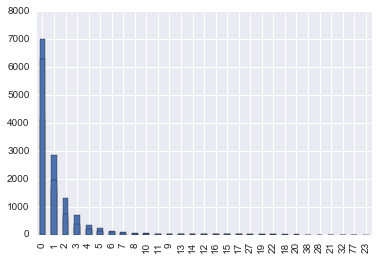

In [19]:
df.useful.value_counts().plot(kind='bar')
df.funny.value_counts().plot(kind='bar')
df.cool.value_counts().plot(kind='bar')

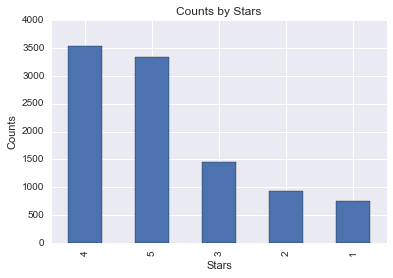

In [21]:
# bar plot of number of useful in each stars
df.stars.value_counts().plot(kind='bar', title='Counts by Stars')
plt.xlabel('Stars')
plt.ylabel('Counts')

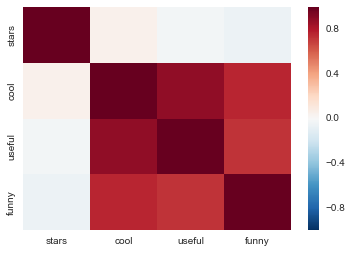

In [23]:
sns.heatmap(df.corr())

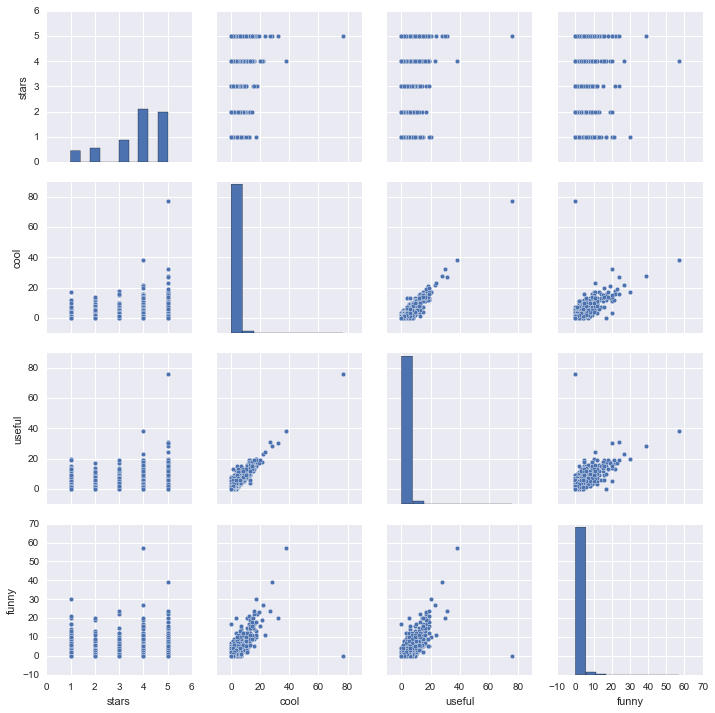

In [24]:
sns.pairplot(df)

#3. Define cool/useful/funny as the features, and stars as the response.

In [28]:
features = ['cool', 'funny', 'useful']
x = df[features]
y = df.stars

#4. Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [32]:
### STATSMODELS ###
# create a fitted model
lm = smf.ols(formula='stars ~ cool', data=df).fit()

# print the coefficients
lm.params

Intercept    3.750433
cool         0.030870
dtype: float64

In [34]:
# create a fitted model
lm = smf.ols(formula='stars ~ useful', data=df).fit()

# print the coefficients
lm.params

Intercept    3.794700
useful      -0.012205
dtype: float64

In [40]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['useful', 'funny']
X = df[feature_cols]
y = df.stars

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

3.78693722032
[ 0.02275916 -0.05919251]


In [30]:
#5. Evaluate the model by using cross validation and computing the RMSE. Does the RMSE make intuitive sense to you?

In [ ]:
#6. Try removing some of the features and see if the RMSE improves.
#7. **Bonus:** Think of some new features you could create from the existing data that might be predictive of the response. (This is called "feature engineering".) Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.
#8. **Bonus:** Compare your best RMSE on testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean rating in the training set for all observations in the testing set.
#9. **Bonus:** Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.
#10. **Bonus:** Figure out how to use linear regression for classification, and compare its classification accuracy to KNN.